In [29]:
library(survival)
library(ggplot2)
#help(clogit)

In [2]:
dir_fig = 'R_clogit/'

In [30]:
#file_main <- 'main_df_toR_lzs_9_10_11_12.csv'
#file_main <- 'main_df_toR_lzs_9_7_5_3.csv'
#file_main <- 'main_df_toR_lzs_14_16_18_20.csv'
#file_main <- 'main_df_toR_lzs_5_7_9_10_11_12_14_16_18_20.csv'
#file_main <- 'main_df_toR_lzs_7_8_9_10_11_12_13_14.csv'
#file_main <- 'main_df_toR.csv'
file_main <- 'main_df_toR_ZS3to6.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print(dim(df_main))
df_main

[1] 243 502


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS6_PLIp9_DEV_BR_GENE_10_utr,count_ZS6_PLIp9_DEV_BR_GENE_10_utr_Q,count_ZS3_PLIp9_DEV_BR_GENE_10_intron,count_ZS3_PLIp9_DEV_BR_GENE_10_intron_Q,count_ZS4_PLIp9_DEV_BR_GENE_10_intron,count_ZS4_PLIp9_DEV_BR_GENE_10_intron_Q,count_ZS5_PLIp9_DEV_BR_GENE_10_intron,count_ZS5_PLIp9_DEV_BR_GENE_10_intron_Q,count_ZS6_PLIp9_DEV_BR_GENE_10_intron,count_ZS6_PLIp9_DEV_BR_GENE_10_intron_Q
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,66,51,8490,6918,5628,4599,2853,2294,1380,1086
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,0,54,48,27,25,16,14,8,7
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,1,1,51,40,22,18,12,10,6,5
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,28,15,7,5,4,2,2,2
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,0,0,26,17,7,6,6,5,3,2
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,37,25,14,9,6,4,4,3
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,0,0,49,37,20,16,10,9,8,8
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,0,39,33,10,9,6,5,5,4
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,0,0,43,38,16,12,8,5,5,4


In [31]:
df_main = df_main[df_main$Platform=='PB',]
print(dim(df_main))
df_main

[1] 142 502


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS6_PLIp9_DEV_BR_GENE_10_utr,count_ZS6_PLIp9_DEV_BR_GENE_10_utr_Q,count_ZS3_PLIp9_DEV_BR_GENE_10_intron,count_ZS3_PLIp9_DEV_BR_GENE_10_intron_Q,count_ZS4_PLIp9_DEV_BR_GENE_10_intron,count_ZS4_PLIp9_DEV_BR_GENE_10_intron_Q,count_ZS5_PLIp9_DEV_BR_GENE_10_intron,count_ZS5_PLIp9_DEV_BR_GENE_10_intron_Q,count_ZS6_PLIp9_DEV_BR_GENE_10_intron,count_ZS6_PLIp9_DEV_BR_GENE_10_intron_Q
,<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,0,54,48,27,25,16,14,8,7
3,F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,1,1,51,40,22,18,12,10,6,5
4,F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,28,15,7,5,4,2,2,2
5,F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,0,0,26,17,7,6,6,5,3,2
6,F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,37,25,14,9,6,4,4,3
7,F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,0,0,49,37,20,16,10,9,8,8
8,F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,0,39,33,10,9,6,5,5,4
9,F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,0,0,43,38,16,12,8,5,5,4
10,F0101,REACH000120,ASD,Male,1,trio,1,1,-0.008356654,-0.006733101,⋯,0,0,26,17,6,4,4,2,2,0


In [10]:
#dim(df_main[df_main$Phenotype==0,])

print(sum(df_main$count_ZS9_FDR_ASD_cds))
print(sum(df_main[df_main$Phenotype==1,]$count_ZS9_FDR_ASD_cds))
print(sum(df_main[df_main$Phenotype==0,]$count_ZS9_FDR_ASD_cds))

print(sum(df_main$count_ZS9_FDR_ASD_utr))
print(sum(df_main[df_main$Phenotype==1,]$count_ZS9_FDR_ASD_utr))
print(sum(df_main[df_main$Phenotype==0,]$count_ZS9_FDR_ASD_utr))

print(sum(df_main$count_ZS9_DEV_BR_GENE_10_intron))
print(sum(df_main[df_main$Phenotype==1,]$count_ZS9_DEV_BR_GENE_10_intron))
print(sum(df_main[df_main$Phenotype==0,]$count_ZS9_DEV_BR_GENE_10_intron))

[1] 1
[1] 0
[1] 1
[1] 2
[1] 0
[1] 2
[1] 566
[1] 179
[1] 387


In [8]:
#dim(df_main[df_main$Phenotype==0,])

print(sum(df_main$count_ZS9_FDR_ASD_cds))
print(sum(df_main[df_main$Phenotype==1,]$count_ZS9_FDR_ASD_cds))
print(sum(df_main[df_main$Phenotype==0,]$count_ZS9_FDR_ASD_cds))

print(sum(df_main$count_ZS9_FDR_ASD_utr))
print(sum(df_main[df_main$Phenotype==1,]$count_ZS9_FDR_ASD_utr))
print(sum(df_main[df_main$Phenotype==0,]$count_ZS9_FDR_ASD_utr))

print(sum(df_main$count_ZS9_DEV_BR_GENE_10_intron))
print(sum(df_main[df_main$Phenotype==1,]$count_ZS9_DEV_BR_GENE_10_intron))
print(sum(df_main[df_main$Phenotype==0,]$count_ZS9_DEV_BR_GENE_10_intron))

[1] 94
[1] 40
[1] 54
[1] 108
[1] 35
[1] 73
[1] 23090
[1] 8618
[1] 14472


In [41]:
#fts = c('FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 'DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_cds', 'LOWPLI_cds',
#           'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 'DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_utr', 'PLIp9_utr', 'LOWPLI_utr',
#           'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 'DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_intron', 'LOWPLI_intron',
#           'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
#fts_labels = c('ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 'dev. brain genes, CDS', 'dev. brain pLI≥.9 genes, CDS', 'pLI≥.9, CDS', 'pLI≤.9, CDS',
#               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 'dev. brain genes, UTR', 'dev. brain pLI≥.9 genes, UTR', 'pLI≥.9, UTR', 'pLI≤.9, UTR',
#               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 'dev. brain genes, intron', 'dev. brain pLI≥.9 genes, intron', 'pLI≥.9, intron', 'pLI≤.9, intron', 
#               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

### Clean features
fts = c('FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_4', 'GNOCCHI_3', 'GNOCCHI_2')
fts_labels = c('ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

zs_thr = 6
#var_suf = ''
var_suf = '_Q'
fig_name = paste(dir_fig, "odds_ratio_clogit_lzs", zs_thr, var_suf, ".png", sep='')
#fig_name = paste(dir_fig, "odds_ratio_clogit_lzs", zs_thr, '_Q', ".png", sep='')

#null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + Platform + 
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
#for (ft in fts[c(1:1)]) {
for (ft in fts) {
    var = paste('count_ZS', zs_thr, '_', ft, var_suf, sep="")
    #var = paste('count_ZS', zs_thr, '_', ft, '_Q', sep="")
    print(var)

    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
    
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + Platform + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))

    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
    
    ano <- anova(null_model, clogit_model, test='Chisq')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
    #print(str(summary(ano)))
    #print(ano)
    #print(str(ano))
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

print('ORs:')
print(ORs)
print('ORs_plus:')
print(ORs_plus)
print('ORs_minus:')
print(ORs_minus)
print('log_ORs:')
print(log_ORs)
print('log_ORs_plus:')
print(log_ORs_plus)
print('log_ORs_minus:')
print(log_ORs_minus)
print('pvals:')
print(pvals)
print('ano_pvals:')
print(ano_pvals)
print('sum_cases:')
print(sum_cases)
print('sum_controls:')
print(sum_controls)
print('sum_case_controls:')
print(sum_case_controls)

[1] "count_ZS6_FDR_ASD_cds_Q"
[1] "count_ZS6_FDR_DD_cds_Q"
[1] "count_ZS6_FDR_NDD_cds_Q"
[1] "count_ZS6_PLIp9_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS6_DEV_BR_GENE_10_cds_Q"
[1] "count_ZS6_PLIp9_cds_Q"
[1] "count_ZS6_LOWPLI_cds_Q"
[1] "count_ZS6_FDR_ASD_utr_Q"


Warning message in coxexact.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; beta may be infinite. ”


[1] "count_ZS6_FDR_DD_utr_Q"
[1] "count_ZS6_FDR_NDD_utr_Q"
[1] "count_ZS6_PLIp9_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS6_DEV_BR_GENE_10_utr_Q"
[1] "count_ZS6_PLIp9_utr_Q"
[1] "count_ZS6_LOWPLI_utr_Q"
[1] "count_ZS6_FDR_ASD_intron_Q"
[1] "count_ZS6_FDR_DD_intron_Q"
[1] "count_ZS6_FDR_NDD_intron_Q"
[1] "count_ZS6_PLIp9_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS6_DEV_BR_GENE_10_intron_Q"
[1] "count_ZS6_PLIp9_intron_Q"
[1] "count_ZS6_LOWPLI_intron_Q"
[1] "count_ZS6_FB_PR_Q"
[1] "count_ZS6_FB_ENH_Q"
[1] "count_ZS6_GNOCCHI_4_Q"
[1] "count_ZS6_GNOCCHI_3_Q"
[1] "count_ZS6_GNOCCHI_2_Q"
[1] "ORs:"
 [1] 1.218218e+00 9.291795e-01 1.281474e+00 5.179004e-01 1.231392e+00
 [6] 1.143675e+00 9.448977e-01 3.955650e+07 7.490577e-01 6.357044e-01
[11] 1.437519e+00 7.114091e-01 1.160469e+00 8.094576e-01 9.632835e-01
[16] 1.014144e+00 9.063207e-01 8.939714e-01 1.025499e+00 9.458466e-01
[21] 9.989254e-01 1.012646e+00 1.044191e+00 8.338647e-01 8.487478e-01
[26] 9.468993e-01
[1] "ORs_plus:"
 [1] 16.932090 11.317302  8.5

In [42]:
#my_data = data.frame('ests' = ests, 'stds' = stds, 'fts' = unlist(fts), 'glm_pval' = pvals, 'ano_pval' = ano_pvals)
my_data = data.frame('ORs' = ORs, 'ORs_plus' = ORs_plus, 'ORs_minus' = ORs_minus,  
                     'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus,  
                     'fts' = fts, 'fts_labels' = fts_labels, 'clogit_pval' = pvals, 'ano_pval' = ano_pvals, 'sum_case_con' = sum_case_controls)
my_data$fts <- factor(my_data$fts, levels = my_data$fts)
my_data <- my_data[!is.infinite(my_data$ORs_plus),]
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
    }
anova_sig <- sapply(my_data$ano_pval, get_pval_char)
print(anova_sig)
my_data$ano_sig = anova_sig
my_data

 [1] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""


,ORs,ORs_plus,ORs_minus,log_ORs,log_ORs_plus,log_ORs_minus,fts,fts_labels,clogit_pval,ano_pval,sum_case_con,ano_sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1.2182182,16.932090,0.08764751,0.19738926,1.5401799367,-1.14540141,FDR_ASD_cds,"ASD FDR, CDS",0.8831326,0.8840097,1/5,
2,0.9291795,11.317302,0.07628802,-0.07345334,1.2019711523,-1.34887783,FDR_DD_cds,"DD FDR, CDS",0.9540742,0.9538866,1/6,
3,1.2814739,8.529750,0.19252328,0.24801091,1.2151455638,-0.71912374,FDR_NDD_cds,"NDD FDR, CDS",0.7976120,0.7995012,2/9,
4,0.5179004,1.652022,0.16235914,-0.65797236,-0.0661389633,-1.24980575,PLIp9_DEV_BR_GENE_10_cds,"dev. brain pLI≥.9 genes, CDS",0.2662445,0.2569121,7/17,
5,1.2313916,2.777052,0.54601967,0.20814491,0.6230735488,-0.20678372,DEV_BR_GENE_10_cds,"dev. brain genes, CDS",0.6159206,0.6181713,16/26,
6,1.1436755,2.387655,0.54781516,0.13424718,0.5097972102,-0.24130285,PLIp9_cds,"pLI≥.9, CDS",0.7207414,0.7210621,17/35,
7,0.9448977,1.396825,0.63918664,-0.05667859,0.1427537468,-0.25611093,LOWPLI_cds,"pLI≤.9, CDS",0.7762574,0.7755024,47/135,
9,0.7490577,5.486572,0.10226557,-0.28893929,0.7270196783,-1.30489825,FDR_DD_utr,"DD FDR, UTR",0.7761034,0.7781555,2/5,
10,0.6357044,3.932709,0.10275870,-0.45302164,0.4767659315,-1.38280920,FDR_NDD_utr,"NDD FDR, UTR",0.6260944,0.6268986,2/7,


[1] "R_clogit/odds_ratio_clogit_lzs6_Q.png"


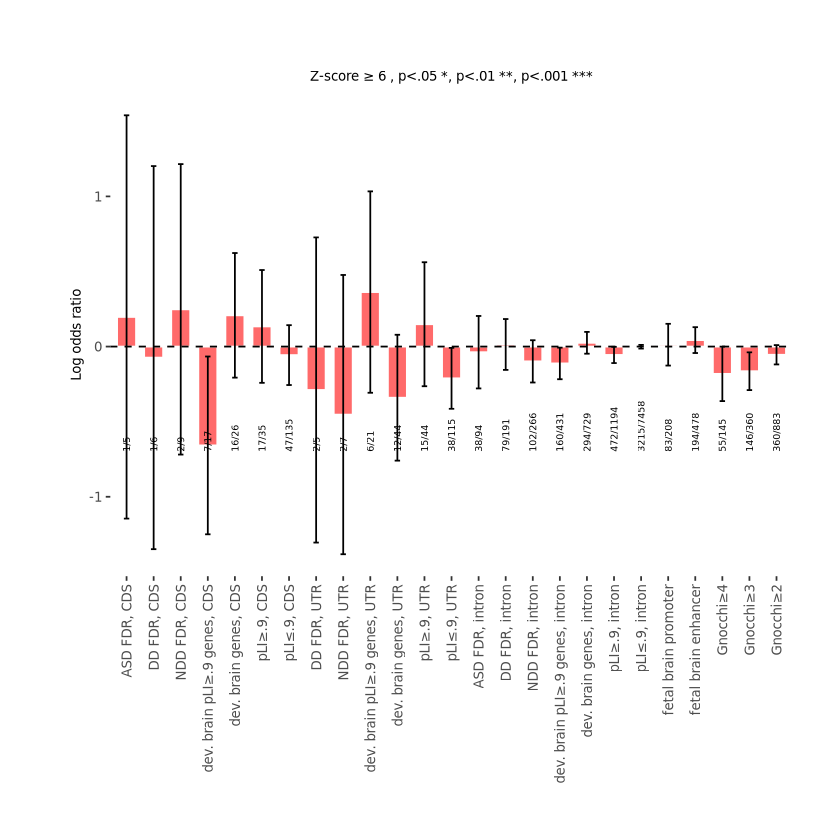

In [43]:
print(fig_name)
#y_sig = .05
#y_sig = 0.75
y_sig = .9
#y_sig = 1.
#y_sig = 1.2
#y_sig = 1.7
size_txt = 8
size_sig = 4
label_pos = -.7

# label = sprintf('%1.4f', ano_pval)
#ggplot(my_data, aes(x = fts, y = ORs, label = sprintf('%1.4f', ano_pval))) +
ggplot(my_data, aes(x = fts, y = log_ORs, label = sum_case_con)) +
  geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
  geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(y = "Log odds ratio", title = paste('Z-score ≥', zs_thr, ', p<.05 *, p<.01 **, p<.001 ***')) +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 90, vjust = .5, hjust=1, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt)
        #axis.line = element_line(),
       ) +
  scale_x_discrete(labels=my_data$fts_labels) +
  annotate("text", x=1:dim(my_data)[1], y=y_sig, label= anova_sig, size=size_sig) +
  geom_text(aes(x = fts, y = label_pos, label = sum_case_con), angle=90, hjust=0, size=2)
  # + 
  #ylim(-0.1, .46)

ggsave(fig_name, width = 5, height = 5)

  #geom_text(vjust=0, angle=45) +
#axis.text=element_text(size=12),
#
#geom_bar(stat = "identity", fill = "lightblue", color = "black") +